In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from skimage.io import imread
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['image.cmap'] = 'viridis' # grayscale looks better

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd

from PIL import Image
base_dir = Path(r'C:\Users\Jay\Documents\FlatironDataSci\archive')

In [3]:
image_overview_df = pd.read_csv(base_dir / 'HAM10000_metadata.csv')
all_image_ids = {c_path.stem: c_path for c_path in base_dir.glob('**/*.jpg')}
image_overview_df['image_path'] = image_overview_df['image_id'].map(all_image_ids.get)
image_overview_df.dropna(inplace=True) # remove values that are missing
print(image_overview_df.shape[0], 'image, recipe pairs loaded')
image_overview_df.sample(3)

9958 image, recipe pairs loaded


,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
6668,HAM_0007017,ISIC_0030838,nv,follow_up,45.0,female,abdomen,C:\Users\Jay\Documents\FlatironDataSci\archive...
4509,HAM_0000522,ISIC_0024826,nv,follow_up,40.0,female,upper extremity,C:\Users\Jay\Documents\FlatironDataSci\archive...
4214,HAM_0006862,ISIC_0025296,nv,follow_up,50.0,female,trunk,C:\Users\Jay\Documents\FlatironDataSci\archive...


In [4]:
image_overview_df.drop(['age'], axis=1).describe()

,lesion_id,image_id,dx,dx_type,sex,localization,image_path
count,9958,9958,9958,9958,9958,9958,9958
unique,7418,9958,7,4,3,15,9958
top,HAM_0003789,ISIC_0033867,nv,histo,male,back,C:\Users\Jay\Documents\FlatironDataSci\archive...
freq,6,1,6660,5332,5400,2192,1


In [5]:
dx_name_dict = {
    'nv': 'melanocytic nevi',
    'mel': 'melanoma',
    'bcc': 'basal cell carcinoma',
    'akiec': 'Actinic keratoses and intraepithelial carcinoma',
    'vasc': 'vascular lesions',
    'bkl': 'benign keratosis-like',
    'df': 'dermatofibroma'
}
image_overview_df['dx_name'] = image_overview_df['dx'].map(dx_name_dict.get)
dx_name_id_dict = {name: id for id, name in enumerate(dx_name_dict.keys())}
image_overview_df['dx_id'] = image_overview_df['dx'].map(dx_name_id_dict.get).astype(int)
image_overview_df.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,dx_name,dx_id
9556,HAM_0004215,ISIC_0034302,nv,consensus,40.0,female,unknown,C:\Users\Jay\Documents\FlatironDataSci\archive...,melanocytic nevi,0
8504,HAM_0006266,ISIC_0028212,nv,histo,75.0,male,lower extremity,C:\Users\Jay\Documents\FlatironDataSci\archive...,melanocytic nevi,0
1775,HAM_0004578,ISIC_0034239,mel,histo,85.0,male,lower extremity,C:\Users\Jay\Documents\FlatironDataSci\archive...,melanoma,1


In [6]:
image_overview_df['dx_name'].value_counts()

melanocytic nevi                                   6660
melanoma                                           1111
benign keratosis-like                              1089
basal cell carcinoma                                514
Actinic keratoses and intraepithelial carcinoma     327
vascular lesions                                    142
dermatofibroma                                      115
Name: dx_name, dtype: int64

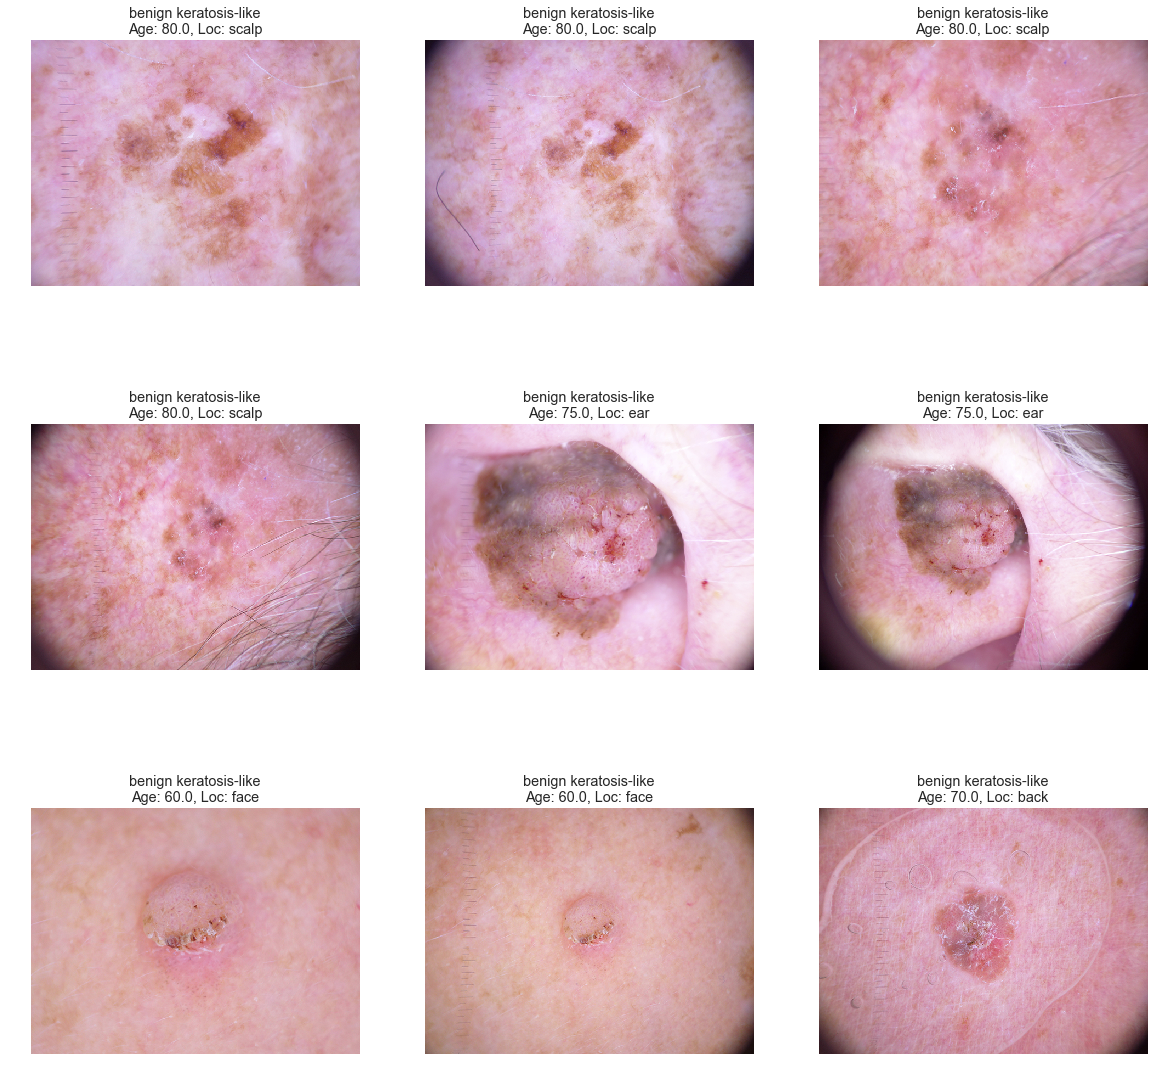

In [7]:
fig, m_axs = plt.subplots(3, 3, figsize=(20, 20))
for c_ax, (_, c_row) in zip(m_axs.flatten(), 
                            image_overview_df.head(9).iterrows()):
    c_ax.imshow(imread(c_row['image_path']))
    c_ax.set_title('{dx_name}\nAge: {age}, Loc: {localization}'.format(**c_row))
    c_ax.axis('off')

In [8]:
test_row = image_overview_df.iloc[1]
print(test_row)

lesion_id                                             HAM_0000118
image_id                                             ISIC_0025030
dx                                                            bkl
dx_type                                                     histo
age                                                            80
sex                                                          male
localization                                                scalp
image_path      C:\Users\Jay\Documents\FlatironDataSci\archive...
dx_name                                     benign keratosis-like
dx_id                                                           5
Name: 1, dtype: object


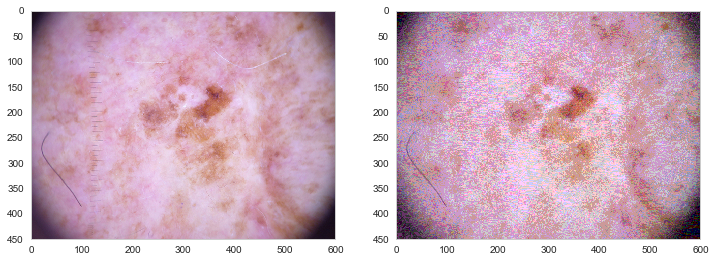

In [9]:
test_image = Image.open(test_row['image_path']) # normal image
# convert to 8bit color (animated GIF) and then back
web_image = test_image.convert('P', palette='WEB', dither=None)
few_color_image = web_image.convert('RGB')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(test_image)
ax2.imshow(few_color_image)

In [10]:
print('Unique colors before', len(set([tuple(rgb) for rgb in np.array(test_image).reshape((-1, 3))])))
print('Unique colors after', len(set([tuple(rgb) for rgb in np.array(few_color_image).reshape((-1, 3))])))

Unique colors before 49451
Unique colors after 61


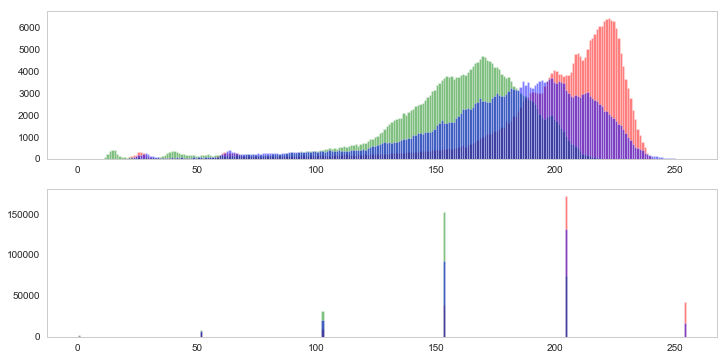

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
for c_channel, c_name in enumerate(['red', 'green', 'blue']):
    ax1.hist(np.array(test_image)[:, :, c_channel].ravel(), 
             color=c_name[0], 
             label=c_name, 
             bins=np.arange(256), 
             alpha=0.5)
    ax2.hist(np.array(few_color_image)[:, :, c_channel].ravel(), 
             color=c_name[0], 
             label=c_name, 
             bins=np.arange(256), 
             alpha=0.5)

In [12]:
idx_to_color = np.array(web_image.getpalette()).reshape((-1, 3))/255.0

Text(0,0.5,'Pixel Count')

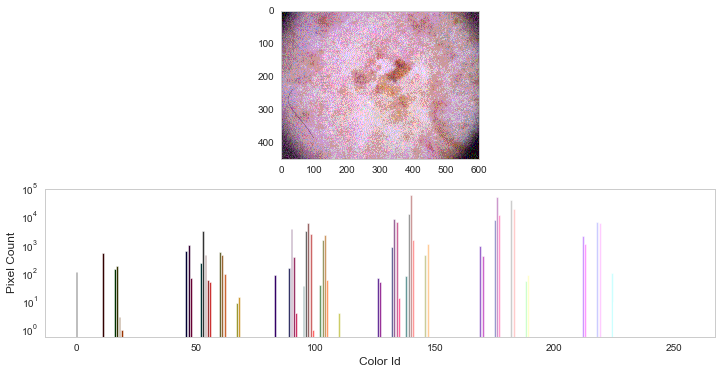

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
ax1.imshow(few_color_image)
counts, bins = np.histogram(web_image, bins=np.arange(256))
for i in range(counts.shape[0]):
    ax2.bar(bins[i], counts[i], color=idx_to_color[i])
ax2.set_yscale('log')
ax2.set_xlabel('Color Id')
ax2.set_ylabel('Pixel Count')

In [14]:
def color_count_feature(in_path):
    raw_image = Image.open(in_path) 
    web_image = raw_image.convert('P', palette='WEB', dither=None)
    counts, bins = np.histogram(np.array(web_image).ravel(), bins=np.arange(256))
    return counts*1.0/np.prod(web_image.size) # normalize output

In [15]:
%%time
image_subset_df = image_overview_df.sample(100).copy()
image_subset_df['color_features'] = image_subset_df['image_path'].map(color_count_feature)
image_subset_df.sample(3)

Wall time: 3.29 s


C:\Users\Jay\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Text(0,0.5,'Frequency')

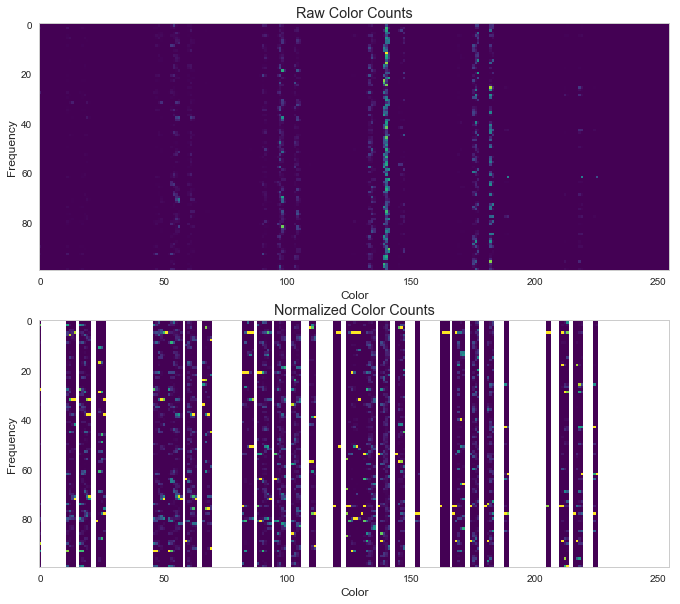

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
combined_features = np.stack(image_subset_df['color_features'].values, 0)
ax1.imshow(combined_features)
ax1.set_title('Raw Color Counts')
ax1.set_xlabel('Color')
ax1.set_ylabel('Frequency')
color_wise_average = np.tile(np.mean(combined_features, 0, keepdims=True), (combined_features.shape[0], 1))
ax2.imshow(combined_features/color_wise_average, vmin=0.05, vmax=20)
ax2.set_title('Normalized Color Counts')
ax2.set_xlabel('Color')
ax2.set_ylabel('Frequency')

In [17]:
from sklearn.decomposition import PCA
xy_pca = PCA(n_components=2)
xy_coords = xy_pca.fit_transform(combined_features)
image_subset_df['x'] = xy_coords[:, 0]
image_subset_df['y'] = xy_coords[:, 1]

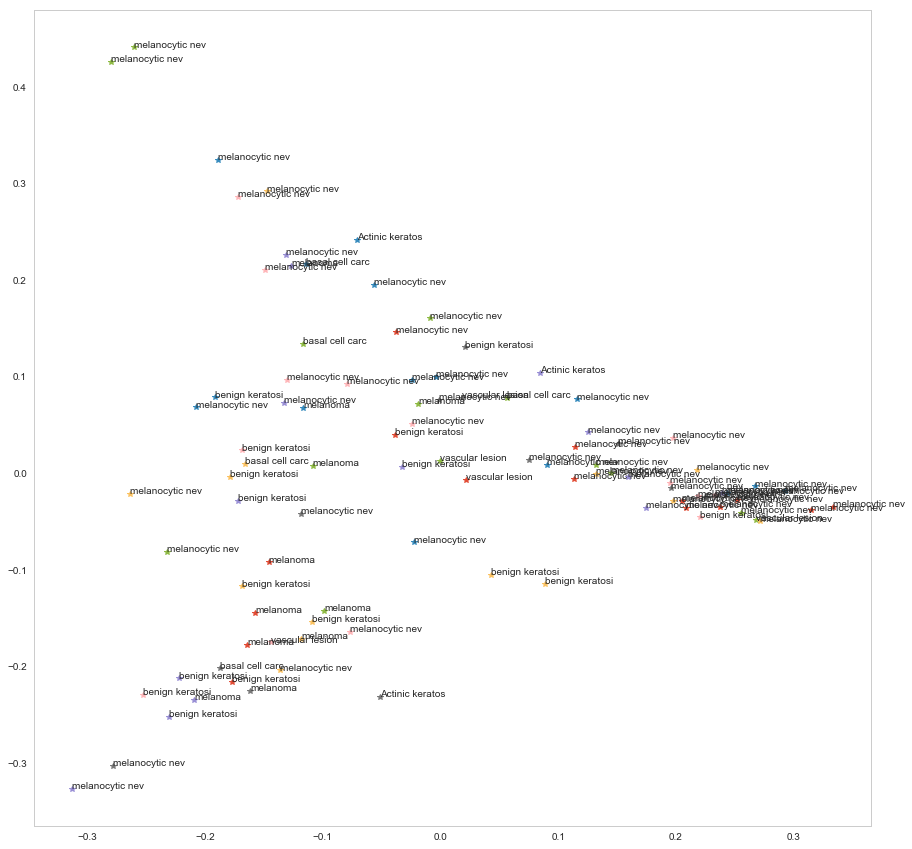

In [18]:
fig, ax1 = plt.subplots(1,1, figsize=(15, 15))
for _, c_row in image_subset_df.iterrows():
    ax1.plot(c_row['x'], c_row['y'], '*')
    ax1.text(s=c_row['dx_name'][:15], x=c_row['x'], y=c_row['y'])

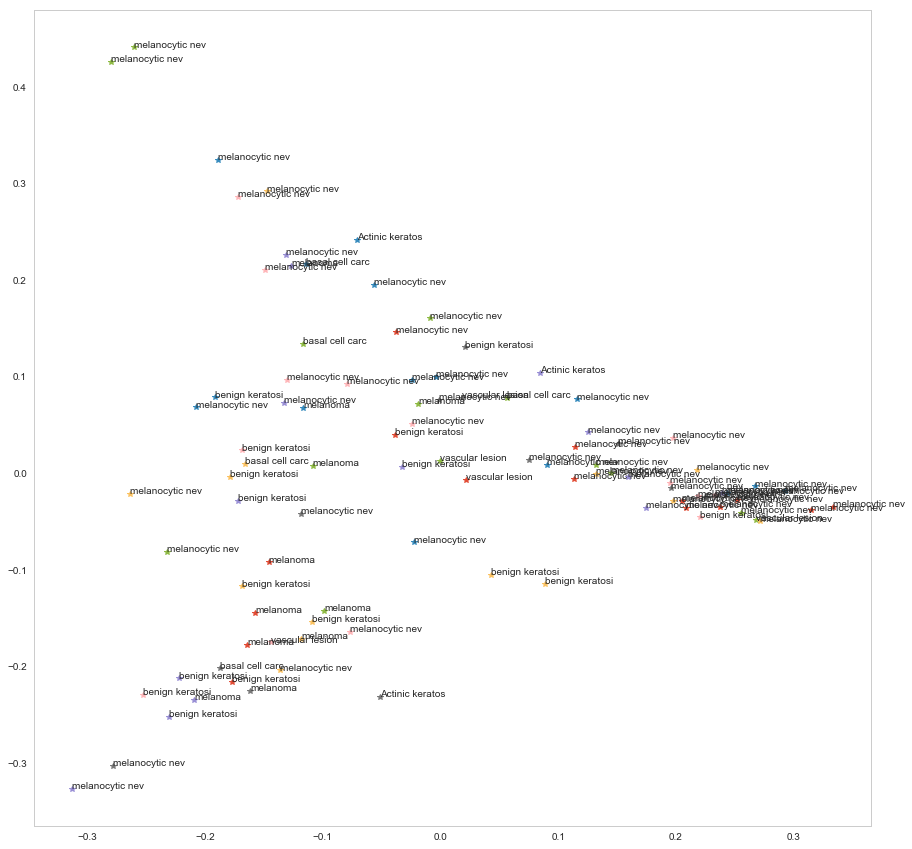

In [19]:
fig, ax1 = plt.subplots(1,1, figsize=(15, 15))
for _, c_row in image_subset_df.iterrows():
    ax1.plot(c_row['x'], c_row['y'], '*')
    ax1.text(s=c_row['dx_name'][:15], x=c_row['x'], y=c_row['y'])

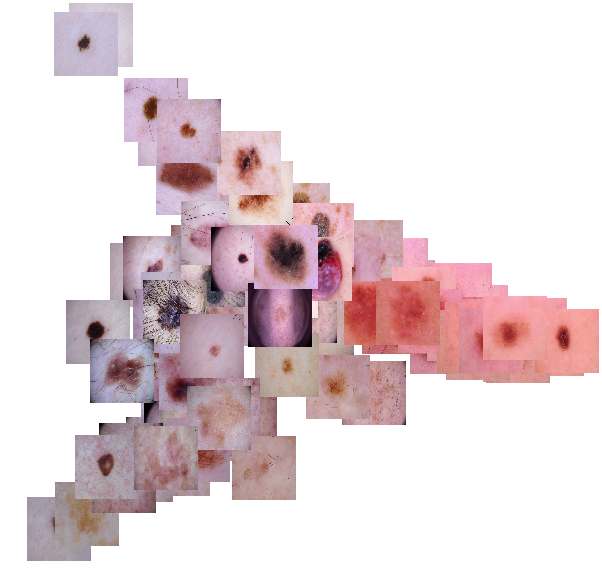

In [20]:
def show_xy_images(in_df, image_zoom=1):
    fig, ax1 = plt.subplots(1,1, figsize=(10, 10))
    artists = []
    for _, c_row in in_df.iterrows():
        c_img = Image.open(c_row['image_path']).resize((64, 64))
        img = OffsetImage(c_img, zoom=image_zoom)
        ab = AnnotationBbox(img, (c_row['x'], c_row['y']), xycoords='data', frameon=False)
        artists.append(ax1.add_artist(ab))
    ax1.update_datalim(in_df[['x', 'y']])
    ax1.autoscale()
    ax1.axis('off')
show_xy_images(image_subset_df)

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_iter=250, verbose=True)
xy_coords = tsne.fit_transform(combined_features)
image_subset_df['x'] = xy_coords[:, 0]
image_subset_df['y'] = xy_coords[:, 1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.195579
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.330734
[t-SNE] Error after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


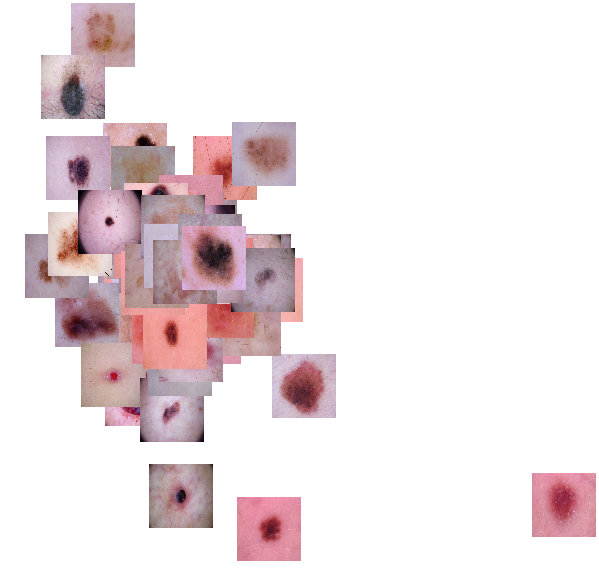

In [22]:
show_xy_images(image_subset_df)

In [23]:
%%time
image_overview_df['color_features'] = image_overview_df['image_path'].map(color_count_feature).map(lambda x: x.tolist())
image_overview_df.sample(3)

Wall time: 5min 11s


In [26]:
image_overview_df['image_path'] = image_overview_df['image_path'].map(str)

In [27]:
image_overview_df.to_json('color_features.json')